In [1]:
using Revise, HarmonicBalance

In [2]:
@variables ω_x, ω_y, t, T, ω, ψ, F, γ, Δω, α1, α2, α12;
@variables x(t), y(t);

In [3]:
#sympy object for the equation of motion

natural_equation = [ d(d(x, t),t) + ω_x^2 * x + γ*d(x,t) + α1*x^3 + 3*α12*y*x^2, 
                    d(d(y,t),t) + ω_y^2*y + γ*d(y,t) + α2*y^3 + α12*x^3] 

forces = [F*cos(ω*t), 0]

dEOM = HarmonicBalance.DifferentialEquation(natural_equation - forces, [x, y])

HarmonicBalance.add_harmonic!(dEOM, x, ω) # x will rotate at ω
HarmonicBalance.add_harmonic!(dEOM, y, 3*ω) # y will rotate at 3*ω

System of 2 differential equations
Variables:       x(t), y(t)
Harmonic ansatz: x(t) => ω;   y(t) => 3ω;   

α1*(x(t)^3) + (ω_x^2)*x(t) + γ*Differential(t)(x(t)) + 3α12*(x(t)^2)*y(t) + Differential(t)(Differential(t)(x(t))) - F*cos(t*ω) ~ 0
α12*(x(t)^3) + α2*(y(t)^3) + (ω_y^2)*y(t) + γ*Differential(t)(y(t)) + Differential(t)(Differential(t)(y(t))) ~ 0


In [4]:
@time averagedEOM = HarmonicBalance.get_harmonic_equations(dEOM, slow_time=T, fast_time=t)

 87.691324 seconds (118.90 M allocations: 6.731 GiB, 2.24% gc time, 99.10% compilation time)


A set of 4 harmonic equations
Variables: u1(T), v1(T), u2(T), v2(T)
Parameters: α1, ω, ω_x, γ, F, α12, α2, ω_y

(ω_x^2)*u1(T) + γ*Differential(T)(u1(T)) + (3//4)*α1*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//4)*α12*(u1(T)^2)*u2(T) + (3//4)*α1*(v1(T)^2)*u1(T) + (3//2)*α12*u1(T)*v1(T)*v2(T) - F - (ω^2)*u1(T) - (3//4)*α12*(v1(T)^2)*u2(T) ~ 0

γ*Differential(T)(v1(T)) + (ω_x^2)*v1(T) + (3//4)*α1*(v1(T)^3) + (3//4)*α1*(u1(T)^2)*v1(T) + (3//4)*α12*(u1(T)^2)*v2(T) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - (3//4)*α12*(v1(T)^2)*v2(T) - γ*ω*u1(T) - (3//2)*α12*u1(T)*u2(T)*v1(T) ~ 0

(ω_y^2)*u2(T) + γ*Differential(T)(u2(T)) + (1//4)*α12*(u1(T)^3) + (3//4)*α2*(u2(T)^3) + (6//1)*ω*Differential(T)(v2(T)) + (3//4)*α2*(v2(T)^2)*u2(T) + (3//1)*γ*ω*v2(T) - (9//1)*(ω^2)*u2(T) - (3//4)*α12*(v1(T)^2)*u1(T) ~ 0

(ω_y^2)*v2(T) + γ*Differential(T)(v2(T)) + (3//4)*α2*(v2(T)^3) + (3//4)*α12*(u1(T)^2)*v1(T) + (3//4)*α2*(u2(T)^2)*v2(T) - (1//4)*α12*(v1(T)^3) - (9//1)*(ω^2)*v2(T) - (6//1)

# solving the algebraic equations

In [5]:
@time problem = HarmonicBalance.Problem(averagedEOM)

 13.036748 seconds (16.30 M allocations: 943.817 MiB, 2.00% gc time, 99.16% compilation time)


4 algebraic equations for steady states
Variables: u1, v1, u2, v2
Parameters: α1, ω, ω_x, γ, F, α12, α2, ω_y
Symbolic Jacobian: true


Solving for 200 parameters... 100%|█████████████████████| Time: 0:00:58
  # parameters solved:  200
  # paths tracked:      1800


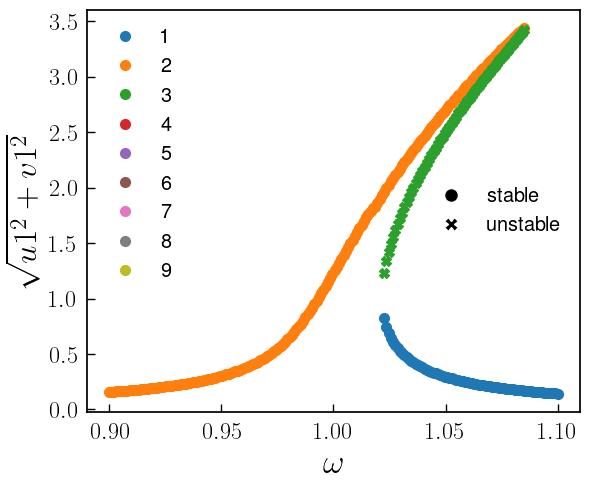

 59.335912 seconds (3.46 M allocations: 199.703 MiB, 0.10% gc time, 1.30% compilation time)
A steady state result for 200 parameter points

Solution branches:   9
   of which real:    3
   of which stable:  2

Classes: stable, physical, Hopf, binary_labels


/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [8]:
fixed_parameters = ParameterList([(ω_x, 1.), (ω_y, 3.05), (γ, 8E-3),(F, 3E-2), (ψ, 0.), (α1, 2E-2),(α2, 20*2E-2),(α12, 5E-3)])
sweep = ParameterRange(ω => LinRange(1.1,0.9,200))
@time soln = HarmonicBalance.get_steady_states(problem, sweep, fixed_parameters, random_warmup=true);
print(soln)
plt = HarmonicBalance.plot_1D_solutions(soln, x="ω", y="sqrt(u1^2 + v1^2)");

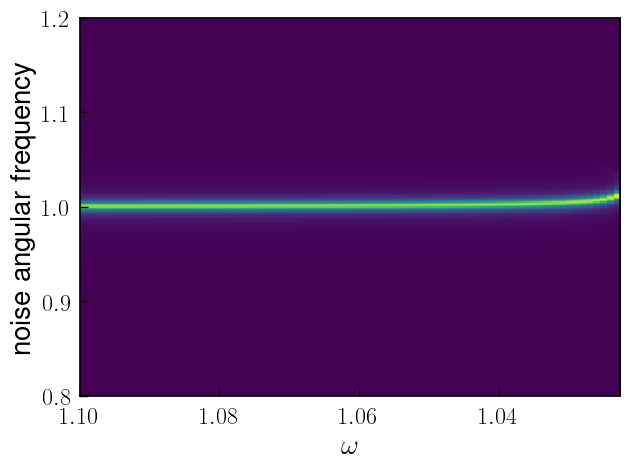

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/hrochan/.julia/packages/PyCall/3fwVL/src/numpy.jl:67


PyObject <matplotlib.image.AxesImage object at 0x7f24ee8773d0>

In [7]:
HarmonicBalance.LinearResponse.plot_response(soln, LinRange(0.8,1.2,300), branch=1)